In [ ]:
import pandas as pd
import numpy as np

import datetime as dt
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


import plotly
import plotly.graph_objs as go
from plotly.offline import *

import statsmodels.formula.api as smf

In [ ]:
from os import getcwd


getcwd

<function nt.getcwd()>

In [ ]:
#df_prices = pd.read_csv('trades 20172022.csv',sep=',')
df_prices = pd.read_csv('C:\\Users\\magbo\\Documents\\Python Scripts\\trades 2017-2022.csv',sep=',')
#df_price.dtypes
df_price = df_prices.copy()
df_price.head(10)

In [52]:
df_price['tradedate'] = pd.to_datetime(df_price['tradedate'],errors='coerce')

#groupby date and sum the sales 
df_price = df_price.groupby('tradedate').sum().reset_index()
df_price = df_price.dropna()
#df_price.head()

#df_price = df_price.set_index("tradedate")
df_price.dtypes

tradedate    datetime64[ns]
volume                int64
amount              float64
dtype: object

In [ ]:
df_price.head()

In [ ]:
df_price.describe()

,volume,amount
count,1204.000000,1.204000e+03
mean,8292.755814,9.055342e+09
std,2677.281834,1.244587e+10
min,3059.000000,1.229861e+09
25%,6552.000000,4.600186e+09
50%,7876.000000,6.719053e+09
75%,9409.000000,1.025639e+10
max,26942.000000,2.558778e+11


In [17]:
#plot monthly price,vol,val
plot_data1 = [
    go.Scatter(
        x=df_price['tradedate'],
        y=df_price['amount'], name="val"
    )
]
plot_layout = go.Layout(
        title='Daily Chart'
    )
fig = go.Figure(data=plot_data1, layout=plot_layout)
fig.update_layout(xaxis_range=['2017-10-01', '2022-08-26'])
#fig.update_layout(yaxis_range=['100000000', '20000000000'])
#plotly.offline.iplot(fig)
fig.show()

In [19]:
#To consider ouliers first checking the quantile
Q1 = df_price.quantile(0.25)
Q3 = df_price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

volume    2.857000e+03
amount    5.656206e+09
dtype: float64


In [21]:
#checking skewness
print(df_price['amount'].skew())
df_price['amount'].describe()
#finds out data is highly skewed

11.803458469512183


count    1.204000e+03
mean     9.055342e+09
std      1.244587e+10
min      1.229861e+09
25%      4.600186e+09
50%      6.719053e+09
75%      1.025639e+10
max      2.558778e+11
Name: amount, dtype: float64

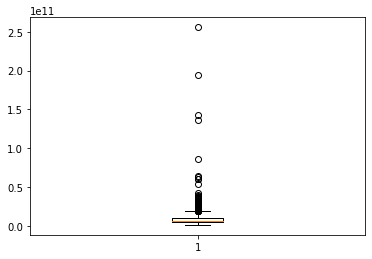

<AxesSubplot:>

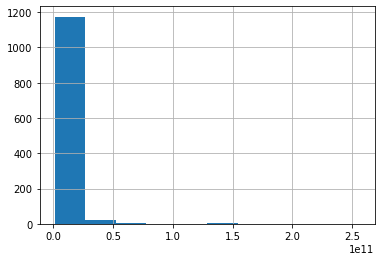

In [24]:
#Check outliers
plt.boxplot(df_price['amount'])
plt.show()

#Also check using this
df_price.amount.hist()
#here I can see my data is right skewed and there are higher values at the right side of the data

In [25]:
#outliers
print(df_price['amount'].quantile(0.10))
print(df_price['amount'].quantile(0.90))



#capped the ouliers
#df_price['trade_amount'] = np.where(df_price['trade_amount'] <3559061470.5, 3559061470.5,df_price['trade_amount'])
#df_price['trade_amount'] = np.where(df_price['trade_amount'] >15305949608.300003, 15305949608.300003,df_price['trade_amount'])
print(df_price['amount'].skew())
#Skewness is now 0.7 so we good.

3302410027.264
15066831087.322002
11.803458469512183


In [27]:
print("Highest allowed",df_price['amount'] .mean() + 3*df_price['amount'] .std())
print("Lowest allowed",df_price['amount'] .mean() - 3*df_price['amount'] .std())

Highest allowed 46392946791.76178
Lowest allowed -28282261840.137024


In [29]:
df_price[(df_price['amount'] >46392946791.76178) | (df_price['amount'] < -28282261840.137024)]

,tradedate,volume,amount
18,2017-11-13,7580,6.085868e+10
38,2017-12-12,10344,5.369228e+10
42,2017-12-18,7194,2.558778e+11
153,2018-05-31,10374,1.423978e+11
411,2019-06-19,6918,1.358468e+11
867,2021-04-19,8796,6.487395e+10
1043,2022-01-05,8098,8.599674e+10
1054,2022-01-20,8694,6.308597e+10
1123,2022-04-29,12774,6.048169e+10
1142,2022-05-30,4614,1.943778e+11


In [30]:
df_price[(df_price['amount'] >46392946791.76178) & (df_price['amount'] < -28282261840.137024)]
df_price
#removes the outliers pata pata

,tradedate,volume,amount
0,2017-10-18,7152,5.987244e+09
1,2017-10-19,8506,3.530940e+09
2,2017-10-20,6478,4.031742e+09
3,2017-10-23,7326,5.440291e+09
4,2017-10-24,7350,3.679935e+09
...,...,...,...
1199,2022-08-22,3939,1.457774e+09
1200,2022-08-23,3548,3.190169e+09
1201,2022-08-24,3763,3.390824e+09
1202,2022-08-25,3524,2.766852e+09


<AxesSubplot:>

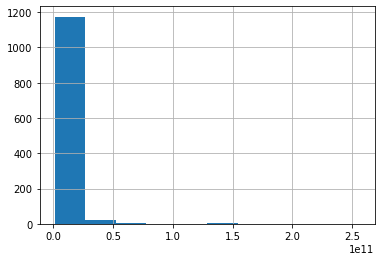

In [31]:
df_price.amount.hist()


In [ ]:
#Downscaling the data
#df_price.set_index('TRADE_DATE', inplace=True)
#resample = df_price.resample('M')
#quarterly_mean_sales = resample.mean()
#print(quarterly_mean_sales.head())
#quarterly_mean_sales.plot()
#pyplot.show()

c:\Users\magbo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\magbo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



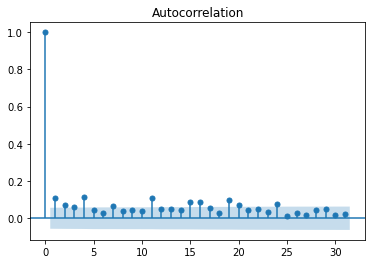

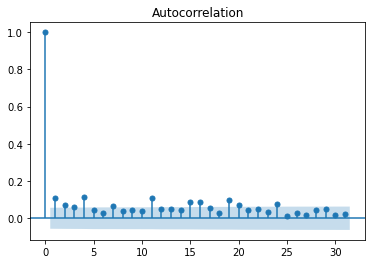

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_price['amount'])

## Here we can see that the degree of autocorrelation in time series is mostly on the positive side, and at some point, it has been of perfect positive correlated nature. So by this plot, we can infer that the present time series is highly correlated with the older time series.

In [33]:
#plot monthly price,vol,val
plot_data1 = [
    go.Scatter(
        x=df_price['tradedate'],
        y=df_price['amount'], name="val"
    )
]
plot_layout = go.Layout(
        title='Daily Chart'
    )
fig = go.Figure(data=plot_data1, layout=plot_layout)
fig.update_layout(xaxis_range=['2017-10-01', '2022-05-04'])
#fig.update_layout(yaxis_range=['100000000', '20000000000'])
#plotly.offline.iplot(fig)
fig.show()

In [53]:
df_price.set_index('tradedate',inplace=True)


,volume,amount
tradedate,,
2017-10-18,7152,5.987244e+09
2017-10-19,8506,3.530940e+09
2017-10-20,6478,4.031742e+09
2017-10-23,7326,5.440291e+09
2017-10-24,7350,3.679935e+09
...,...,...
2022-08-22,3939,1.457774e+09
2022-08-23,3548,3.190169e+09
2022-08-24,3763,3.390824e+09


In [35]:
print(df_price)

            volume        amount
tradedate                       
2017-10-18    7152  5.987244e+09
2017-10-19    8506  3.530940e+09
2017-10-20    6478  4.031742e+09
2017-10-23    7326  5.440291e+09
2017-10-24    7350  3.679935e+09
...            ...           ...
2022-08-22    3939  1.457774e+09
2022-08-23    3548  3.190169e+09
2022-08-24    3763  3.390824e+09
2022-08-25    3524  2.766852e+09
2022-08-26    3327  4.654869e+09

[1204 rows x 2 columns]


In [36]:
idx = df_prices['tradedate']
print(pd.infer_freq(idx))

None


C:\Users\magbo\AppData\Local\Temp\ipykernel_27208\3305088964.py:7: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead.



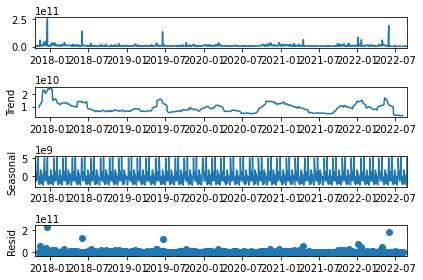

In [37]:
#check seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

#df_price.set_index('TRADE_DATE', inplace=True)
analysis = df_price[['amount']].copy()

decompose_result_mult = seasonal_decompose(analysis, model="additive",freq=30)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();
# after checking I didn't find seasonality in my data just the trend line

In [ ]:
#import matplotlib.pyplot as plt
#diet = df_prices['trade_amount']
#diet.rolling(30).mean().plot(figsize=(10,5),linewidth=5,fontsize=10)
#plt.xlabel('month',fontsize=10)
#diet.diff().plot(figsize=(10,5),linewidth=5,fontsize=10)
#plt.xlabel('month',fontsize=10)

In [39]:
#create a new dataframe to model the difference
df_diff = df_price.copy()
#add previous price,vol,val to the next row
#df_diff['prev_price'] = df_diff['Price'].shift(1)
#df_diff['prev_vol'] = df_diff['Volume'].shift(1)
load_val = df_diff[['amount']]
window = load_val.expanding() 
df_diff['prev_val'] = df_diff['amount'].shift(1)# this is the datetime features
df_diff['min'] = window.min()
df_diff['mean'] = window.mean()
df_diff['max'] = window.max()


#drop the null values and calculate the difference
df_diff = df_diff.dropna()
df_diff['dif_val'] = (df_diff['amount'] - df_diff['prev_val'])
df_diff.head(10)

,volume,amount,prev_val,min,mean,max,dif_val
tradedate,,,,,,,
2017-10-19,8506,3.530940e+09,5.987244e+09,3.530940e+09,4.759092e+09,5.987244e+09,-2.456304e+09
2017-10-20,6478,4.031742e+09,3.530940e+09,3.530940e+09,4.516642e+09,5.987244e+09,5.008023e+08
2017-10-23,7326,5.440291e+09,4.031742e+09,3.530940e+09,4.747554e+09,5.987244e+09,1.408549e+09
2017-10-24,7350,3.679935e+09,5.440291e+09,3.530940e+09,4.534030e+09,5.987244e+09,-1.760356e+09
2017-10-25,7220,9.356610e+09,3.679935e+09,3.530940e+09,5.337794e+09,9.356610e+09,5.676675e+09
2017-10-26,8922,8.676268e+09,9.356610e+09,3.530940e+09,5.814719e+09,9.356610e+09,-6.803426e+08
2017-10-27,8126,6.204624e+09,8.676268e+09,3.530940e+09,5.863457e+09,9.356610e+09,-2.471643e+09
2017-10-30,7218,3.787889e+09,6.204624e+09,3.530940e+09,5.632838e+09,9.356610e+09,-2.416736e+09
2017-10-31,9030,6.115318e+09,3.787889e+09,3.530940e+09,5.681086e+09,9.356610e+09,2.327429e+09


In [ ]:
df_diff.head(10)

In [ ]:
#plot sales diff
plot_data = [
    go.Scatter(
        x=df_diff['tradedate'],
        y=df_diff['dif_val'],
        name='difval'
    ),
    go.Scatter(
        x=df_diff['tradedate'],
        y=df_diff['amount'],
        name='val'
    )
]
plot_layout = go.Layout(
        title='Daily Dif'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
plotly.offline.iplot(fig)

In [41]:
#create dataframe for transformation from time series to supervised
#df_supervised = df_diff.drop(['prev_price','prev_vol','prev_val'],axis='columns')
df_supervised = df_diff.drop(['prev_val'],axis=1)

#adding lags(a period of time between one event and another.)
for inc in range(1,30):
    field_name = 'vla_' + str(inc)
    df_supervised[field_name] = df_supervised['dif_val'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)

In [ ]:
df_supervised.head(10)

## `OLS is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression).`



In [42]:
# Define the regression formula: ordinary least squares
model = smf.ols(formula='dif_val ~ vla_1+vla_2+vla_3+vla_4+vla_5+vla_6+vla_7+vla_8+vla_9+vla_10+vla_11+vla_12+vla_13+vla_14+vla_15+vla_16+vla_17+vla_18+vla_19+vla_20', data=df_supervised)

#this formula 'diff ~ lag_1' returns lagged and iterated differences: differencing
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.4489464836222783


In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                dif_val   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     48.78
Date:                Mon, 29 Aug 2022   Prob (F-statistic):          5.92e-138
Time:                        16:06:46   Log-Likelihood:                -28937.
No. Observations:                1174   AIC:                         5.792e+04
Df Residuals:                    1153   BIC:                         5.802e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.625e+07   3.61e+08     -0.211      0.833   -7.85e+08    6.32e+08
vla_1         -0.9010      0.029    -30.610      0.000      -0.959      -0.843
vla_2         -0.8417      0.040    -21.278      0.000      -0.919      -0.764
vla_3         -0.8048      0.046    -17.336      0.000      -0.896      -0.714
vla_4         -0.7039      0.052    -13.569      0.000      -0.806      -0.602
vla_5         -0.6822      0.056    -12.289      0.000      -0.791      -0.573
vla_6         -0.6731      0.058    -11.522      0.000      -0.788      -0.559
vla_7         -0.6189      0.061    -10.175      0.000      -0.738      -0.500
vla_8         -0.6023      0.063     -9.637      0.000      -0.725      -0.480
vla_9         -0.5734      0.064     -8.986      0.000      -0.699      -0.448
vla_10        -0.5420      0.065     -8.374      0.000      -0.669      -0.415
vla_11        -0.4375      0.065     -6.762      0.000      -0.564      -0.311
vla_12        -0.4126      0.064     -6.477      0.000      -0.538      -0.288
vla_13        -0.3767      0.062     -6.043      0.000      -0.499      -0.254
vla_14        -0.3474      0.061     -5.734      0.000      -0.466      -0.229
vla_15        -0.2849      0.058     -4.899      0.000      -0.399      -0.171
vla_16        -0.2113      0.055     -3.828      0.000      -0.320      -0.103
vla_17        -0.1731      0.052     -3.357      0.001      -0.274      -0.072
vla_18        -0.1650      0.046     -3.575      0.000      -0.256      -0.074
vla_19        -0.0791      0.039     -2.014      0.044      -0.156      -0.002
vla_20        -0.0303      0.029     -1.040      0.299      -0.088       0.027
==============================================================================
Omnibus:                     2012.897   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1567230.049
Skew:                          11.238   Prob(JB):                         0.00
Kurtosis:                     180.577   Cond. No.                     2.50e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df_supervised.head()

In [45]:
#import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler
#Remove rows we don't want to predict
#df_model = df_supervised.drop(['Price','TradeDate','Value','Volume'],axis=1)
df_model = df_supervised.drop(['volume','amount'],axis=1)#'TRADE_DATE,
#split train and test set
#X_train, X_test, y_train, y_test = train_test_split(data_X, y_data, test_size=0.25, random_state= seed)
train_set, test_set = df_model[0:-180].values, df_model[-180:].values
# split into train and test sets
#train_size = int(len(df_model) * 0.70)
#test_size = len(df_model) - train_size
#train_set, test_set = df_model[0:train_size].values, df_model[train_size:len(df_model)].values
train_set.shape
test_set.shape

(180, 33)

In [54]:
len(train_set)

994

In [55]:
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [56]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 1:]#train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 1:]#test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [57]:
y_test = y_test.reshape(y_test.shape[0], 1, y_test.shape[1])

In [58]:
X_test.shape,y_test.shape

((180, 1, 32), (180, 1, 32))

In [59]:
model = Sequential()
model.add(LSTM(100, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=1, shuffle=False)

Epoch 1/20
50/50 [==============================] - 3s 4ms/step - loss: 0.0647
Epoch 2/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0589
Epoch 3/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0575
Epoch 4/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0546
Epoch 5/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 6/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0533
Epoch 7/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 8/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 9/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 10/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 11/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0530
Epoch 12/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0530
Epoch 13/20
50/50 [==============================

In [60]:
y_pred = model.predict(X_test,batch_size=1)
#for multistep prediction, you need to replace X_test values with the predictions coming from t-1

In [61]:
#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    print( np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

[[ 0.00975141 -0.98575173  1.          0.03196458 -0.00771877  0.02981577
   0.01438674  0.02670406  0.005458    0.01007029  0.01943727  0.02254389
  -0.0968948   0.12505815  0.02101476 -0.01331438 -0.03101792  0.07693094
   0.0126024   0.03613324 -0.01338606  0.03346895  0.00251938  0.03768942
   0.02346121  0.01014852  0.00537717  0.01594274 -0.07255787  0.09389778
   0.02558104 -0.00411933 -0.00108567]]
[[ 0.0051541  -0.98481808  1.          0.03367468  0.03196458 -0.00771877
   0.02981577  0.01438674  0.02670406  0.005458    0.01007029  0.01943727
   0.02254389 -0.0968948   0.12505815  0.02101476 -0.01331438 -0.03101792
   0.07693094  0.0126024   0.03613324 -0.01338606  0.03346895  0.00251938
   0.03768942  0.02346121  0.01014852  0.00537717  0.01594274 -0.07255787
   0.09389778  0.02558104 -0.00411933]]
[[ 0.01709712 -0.98362487  1.          0.02049263  0.03367468  0.03196458
  -0.00771877  0.02981577  0.01438674  0.02670406  0.005458    0.01007029
   0.01943727  0.02254389 -0.096

In [ ]:
print(pred_test_set_inverted)


In [ ]:
df_price.head()

In [65]:
#create dataframe that shows the predicted menene
result_list = []
sales_dates = list(df_price[7:].tradedate)
act_values = list(df_price[30:].amount)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_values[index])
    result_dict['tradedate'] = sales_dates[index+30]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#for multistep prediction, replace act_values with the predicted sales

In [ ]:
print(df_pred)

In [83]:
#merge with actual sales dataframe
df_pred = pd.merge(df_price,df_result,on='tradedate',how='left')
#plot actual and predicted
plot_data = [
    go.Scatter(
        x=df_pred['tradedate'],
        y=df_pred['amount'],
        name='actual' 
      
    ),
        go.Scatter(
        x=df_pred['tradedate'],
        y=df_pred['pred_value'],
        name='predicted'
    )
    
]
plot_layout = go.Layout(
        title='Trade Prediction')

fig = go.Figure(data=plot_data, layout=plot_layout,)
fig.update_layout(xaxis_range=['2017-12-11', '2022-04-04'])#'2019-05-31'
plotly.offline.iplot(fig)

In [81]:
df2 = pd.DataFrame().assign(
    date=df_pred['tradedate'],
    value=df_pred['amount'],
    predicted_value=df_pred['pred_value'])
#df2.to_csv(r'File Name.csv')

In [84]:
from sklearn.metrics import mean_squared_error
from math import sqrt
df_pred = df_pred.dropna()
rmse=mean_squared_error(df_pred['amount'],df_pred['pred_value']) 
print(sqrt(rmse))

30382660675.847652


In [85]:
print(df_pred)

     tradedate  volume        amount    pred_value
37  2017-12-11    9926  9.930877e+09  1.106392e+10
38  2017-12-12   10344  5.369228e+10  4.532437e+10
39  2017-12-13   10602  8.824129e+09  1.526395e+10
40  2017-12-14    9412  1.244611e+10  1.815668e+10
41  2017-12-15    8424  1.835108e+10  1.715398e+10
..         ...     ...           ...           ...
212 2018-08-28    6840  1.113755e+10  8.416679e+09
213 2018-08-29    6590  4.630359e+09  8.734738e+09
214 2018-08-30    6638  6.962062e+09  8.150929e+09
215 2018-08-31    8200  2.011205e+10  8.974175e+09
216 2018-09-03    6196  6.271840e+09  7.643606e+09

[180 rows x 4 columns]


In [71]:
n_future = 60   # Number of days we want to predict into the future
# Generate list of sequence of days for predictions
datelist_train = list(pd.to_datetime(df_price['tradedate'],errors='coerce'))
#datelist_train = [dt.datetime(date, '%Y-%m-%d').date() for date in datelist_train]
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()


# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [ ]:
print(datelist_future_)

In [72]:
# Perform predictions
predictions_future = model.predict(X_test[-n_future:])
#predictions_future = model.predict(X_train[-n_future:])

#predictions_train = model.predict(X_train[n_past:])



In [73]:
#reshape y_pred
f_pred = predictions_future.reshape(predictions_future.shape[0], 1, predictions_future.shape[1])
#rebuild test set for inverse transform
f_pred_test_set = []
for index in range(0,len(f_pred)):
    print( np.concatenate([f_pred[index],X_train[index]],axis=1))
    f_pred_test_set.append(np.concatenate([f_pred[index],X_train[index]],axis=1))
#reshape pred_test_set
f_pred_test_set = np.array(pred_test_set)
f_pred_test_set = f_pred_test_set.reshape(f_pred_test_set.shape[0], f_pred_test_set.shape[1])
#inverse transform
f_pred_test_set_inverted = scaler.inverse_transform(f_pred_test_set)


[[-0.00399452 -0.88595266 -1.          0.01068181  0.0160424   0.01330613
   0.00364708  0.02315213  0.0343893   0.02249424 -0.0164252  -0.02926592
   0.08496499  0.01462112 -0.20812276  0.24558722  0.00839055  0.02971561
   0.0064827   0.01565692  0.00853986  0.01385135  0.0050203   0.0334493
   0.02517988  0.00551696  0.00528938  0.01271371  0.03906135  0.00823742
   0.02137144  0.01760915  0.00535296]]
[[ 0.00560809 -0.65254418 -1.          0.15755028  0.01068181  0.0160424
   0.01330613  0.00364708  0.02315213  0.0343893   0.02249424 -0.0164252
  -0.02926592  0.08496499  0.01462112 -0.20812276  0.24558722  0.00839055
   0.02971561  0.0064827   0.01565692  0.00853986  0.01385135  0.0050203
   0.0334493   0.02517988  0.00551696  0.00528938  0.01271371  0.03906135
   0.00823742  0.02137144  0.01760915]]


In [ ]:
print(f_pred_test_set_inverted)

In [74]:
#create dataframe that shows the future predicted menene
result_list2 = []
#datelist_future_
#sales_dates = list(df_price[7:].TradeDate)
act_values = list(df_price[30:].amount)
dt_result = pd.to_datetime(datelist_future_,errors='coerce')
for index in range(0,len(f_pred_test_set_inverted)):
    result_dict2 = {}
    result_dict2['fpred_value'] = int(f_pred_test_set_inverted[index][0] + act_values[index])
    #result_dict2['TradeDate'] = dt_result
    result_list2.append(result_dict2)
df2_result = pd.DataFrame(result_list2)

In [75]:
dt_result = pd.to_datetime(datelist_future_,errors='coerce')
print(dt_result)

DatetimeIndex(['2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02',
               '2022-09-03', '2022-09-04', '2022-09-05', '2022-09-06',
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10',
               '2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16', '2022-09-17', '2022-09-18',
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
               '2022-09-23', '2022-09-24', '2022-09-25', '2022-09-26',
               '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30',
               '2022-10-01', '2022-10-02', '2022-10-03', '2022-10-04',
               '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08',
               '2022-10-09', '2022-10-10', '2022-10-11', '2022-10-12',
               '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
               '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
      

In [86]:
print(df_pred)

     tradedate  volume        amount    pred_value
37  2017-12-11    9926  9.930877e+09  1.106392e+10
38  2017-12-12   10344  5.369228e+10  4.532437e+10
39  2017-12-13   10602  8.824129e+09  1.526395e+10
40  2017-12-14    9412  1.244611e+10  1.815668e+10
41  2017-12-15    8424  1.835108e+10  1.715398e+10
..         ...     ...           ...           ...
212 2018-08-28    6840  1.113755e+10  8.416679e+09
213 2018-08-29    6590  4.630359e+09  8.734738e+09
214 2018-08-30    6638  6.962062e+09  8.150929e+09
215 2018-08-31    8200  2.011205e+10  8.974175e+09
216 2018-09-03    6196  6.271840e+09  7.643606e+09

[180 rows x 4 columns]


In [79]:
df_pred = pd.merge(df_price,df_result,on='tradedate',how='left')
#plot actual and predicted
plot_data = [
    go.Scatter(
        x=df_pred['tradedate'],
        y=df_pred['amount'],
        name='actual' 
      
    ),
        go.Scatter(
        x=df_pred['tradedate'],
        y=df_pred['pred_value'],
        name='predicted'
    ),
        go.Scatter(
        x=dt_result,
        y=df2_result['fpred_value'],
        name='forcasted'
    )
    
]
plot_layout = go.Layout(
        title='Trade Prediction')

fig = go.Figure(data=plot_data, layout=plot_layout,)
#fig.update_layout(xaxis_range=['2017-12-01', '2018-09-30'])#'2019-05-31'
fig.update_layout(xaxis_range=['2022-01-01', '2022-09-30'])#'2019-05-31'
plotly.offline.iplot(fig)